In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [104]:
# Create pandas dataframe from csv
df = pd.read_csv("../Website/Data/map_pioneer_data.csv", sep=",", header=None, names=["id","name","aka","link","image_url","worked_as","worked_in","DOB","YOB","DOD","YOD"])

In [105]:
# Helper function that renders the value of a bar on the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 0.25
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="center", size=15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [106]:
# Divide
df["worked_in"] = df["worked_in"].apply(lambda x: x.split("|") if "|" in x else x)
df["worked_as"] = df["worked_as"].apply(lambda x: x.split("|") if "|" in x else x)
df["worked_as"] = df["worked_as"].apply(lambda x: ''.join(x.split(">")[1:]) if ">" in x else x)
df.head()

,id,name,aka,link,image_url,worked_as,worked_in,DOB,YOB,DOD,YOD
0,id,name,aka,link,image_url,worked_as,worked_in,DOB,YOB,DOD,YOD
1,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,"[director, writer>journalist]",Great Britain,NaN,1853,NaN,1931
2,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,"[business partner>business co-owner, company d...","[Great Britain, United States]",May 15,1868,NaN,1937
3,1704,Ada Egede-Nissen,Ada Kramm,https://wfpp.columbia.edu/person/ada-egede-nis...,NaN,"[actress>film actress, actress>theatre actress]","[Germany, Norway]",NaN,1899,NaN,1981
4,1337,Adela Rogers St. Johns,Nora Adela Rogers|Adela Rogers Saint Johns|Ade...,https://wfpp.columbia.edu/person/adela-rogers-...,https://wfpp.columbia.edu/wp-content/uploads/2...,"[writer>journalist, writer>novelist, writer>sc...",United States,May 20,1894,August 10,1988


In [107]:
#Country List
countries = []

#Add Countries
for worked_in in df["worked_in"][1:]:
    if(isinstance(worked_in, list)):
        for temp in worked_in:
            if(not countries.__contains__(temp)):
                countries.append(temp)
    else:
        if(not countries.__contains__(worked_in)):
            countries.append(worked_in)

#Pioneer in Countries
dictionary = dict.fromkeys(countries, 0)

#Add Values
for worked_in in df["worked_in"][1:]:
    if(isinstance(worked_in, list)):
        for temp in worked_in:
            dictionary[temp] = dictionary[temp] + 1
    else:
        dictionary[worked_in] = dictionary[worked_in] + 1

#Sort
dictionary = dict(reversed(sorted(dictionary.items(), key=lambda item: item[1])))

#Convert
converted_dict = {"Countries": dictionary.keys(), "Count": dictionary.values()}

#Convert to dataframe
data = pd.DataFrame(data=converted_dict)

AttributeError: 'Rectangle' object has no property 'axlabel'

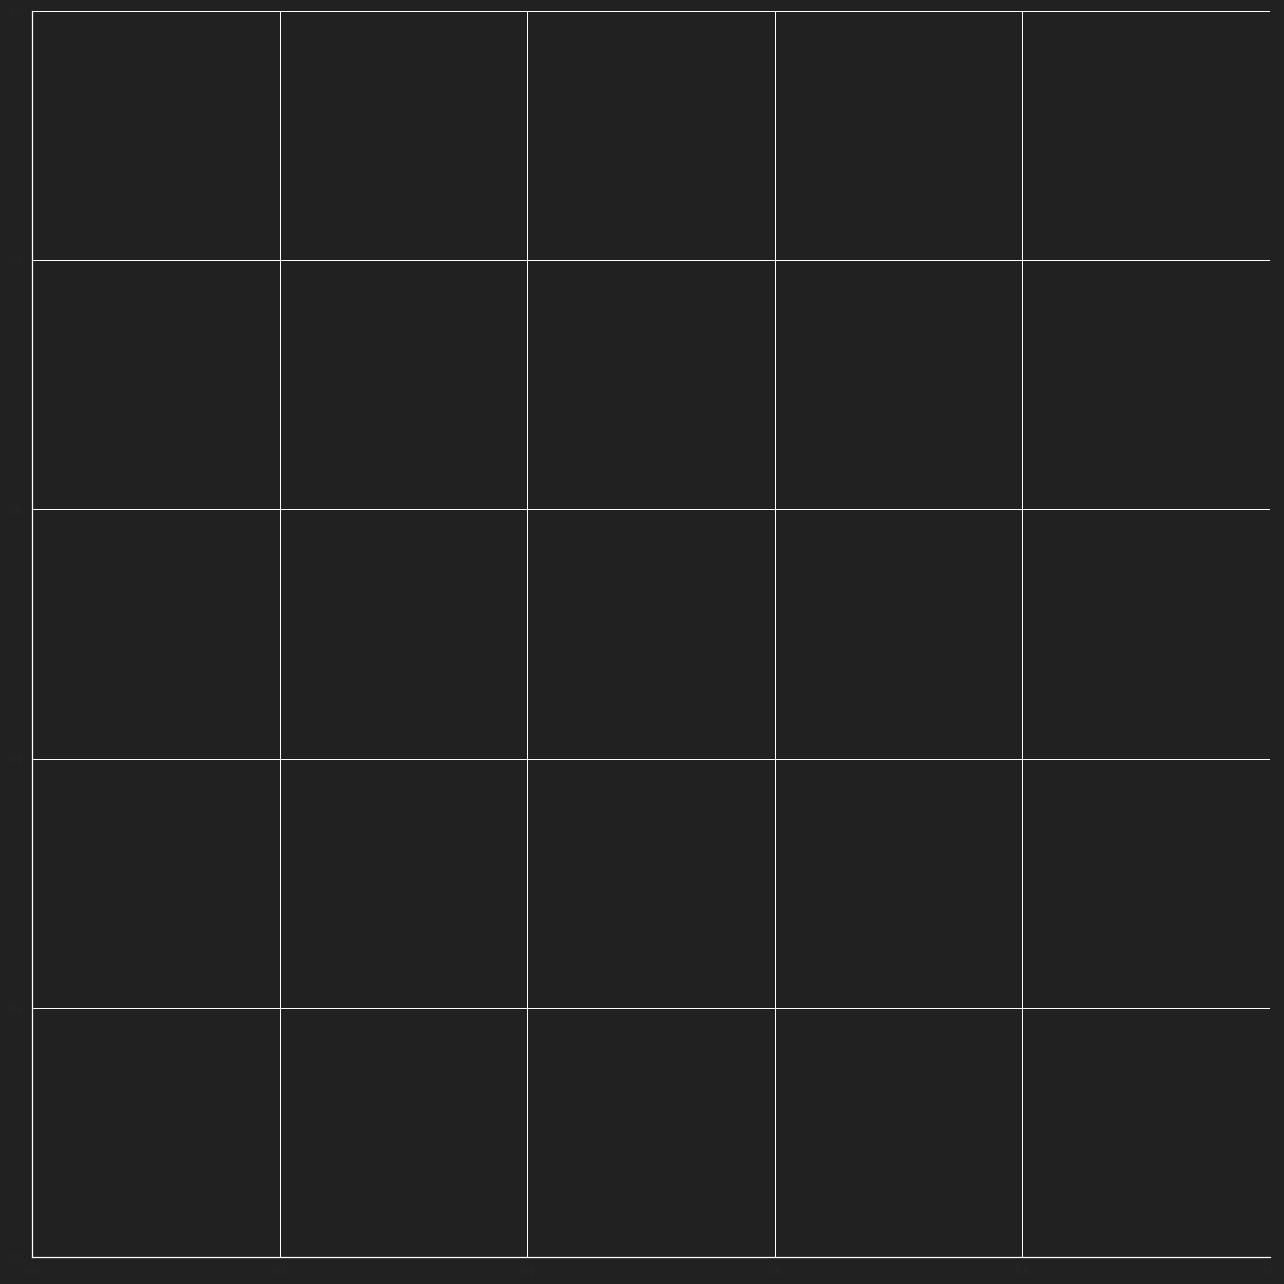

In [108]:
# Pre style setting
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(1.7,8.27)})
sns.set(rc={'axes.facecolor':'0.12890625', 'figure.facecolor':'0.12890625'})

# Render a plot
data_plt = sns.catplot(
    x="Count",
    y="Countries", 
    data=data, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18
    )

#Add Values
show_values_on_bars(data_plt.axes)

x_labels = [0, 25, 50, 75, 100, 125, 150, 175, ""]
y_labels = data["Countries"]

data_plt.set_xticklabels(x_labels, size=40, color = "White")
data_plt.set_yticklabels(y_labels, size=20, color = "White")

# If plot is ok, save it to a file
plt.savefig('../Website/Images/map_country_count_plot.png', bbox_inches='tight')